# Synthesizer

In diesem Notebook werde ich erklären, was ein Synthesizer ist und wie er funktioniert. Später werde ich versuchen diese Funktion in C zu formulieren, um dies auf dem ARM Cortex FM4 zu implementieren.



## 1. Was ist ein Synthesizer

Ein Synthesizer ist ein Musikinstrument, welches in den 1960iger Jahren entwickelt wurde. Die Frühen Synthesizer waren alle Monophone, das bedeutet, sie konnten grundsätzlich nur einen Ton zur Zeit ausgeben. Das ist vergleichbar mit einem Klavier, bei dem immer nur eine Taste zur Zeit gedrückt werden konnte. Später wurden dann aber auch Polyphone entwickelt, die entweder über komplizierte analoge Schaltungen oder durch verwendung von digitaler Technik zwei oder mehr Töne gleichzeitig ausgeben konnten.


## 2. Wie funktioniert ein Syntheziser

Wichtig zu verstehen ist vor allem, dass alles, was wir hören können eine periodische Druckänderung im Raum ist:

>Schall kann definiert werden als zeitliche und örtliche Änderung des Druckes bzw. der Dichte einer Materie oder als örtlich begrenzte Änderung des Abstandes der Stoffteilchen gegenüber dem durchschnittlichen Abstand der Teilchen des umgebenden Stoffes. Weil Stoffteilchen nicht nur in Gasen (z. B. Luft), sondern auch in Flüssigkeiten oder Feststoffen vorkommen, kann sich der Schall folglich überall außer im Vakuum, das keine Stoffteilchen enthält, ausbreiten. Schall benötigt daher – im Gegensatz zum Licht, das sich auch im Vakuum ausbreiten kann – ein sog. Überträgermedium (Schallträger).
>
>Klatscht man in die Hände, so verdrängt man die Luft zwischen den Handflächen. Dies hat eine kurze lokale Druckänderung zur Folge (Fig. 2); man hat Schall erzeugt.
>
> -wikibooks.org

![alt text](images/Pressure_change.png "Klatschen")

Unser Ohr könnte man akso als Sensor verstehen, der eine Druckänderung im Raum misst, die Signale ans Gehirn weitergibt, welches dies als das gehörte interpretiert.
In den meisten Lautsprechern werden diese Druckänderungen über schwingende Membranen erzeugt, welche von einem schwingenden Signal engeregt werden. In den folgenden Kapiteln möchte ich erläutern, wie ein Syntheziser dieses Signal erzeugt.



### 2.1 Tonerzeugung

Zur Tonerzeugung nutzt der Synthesizer VCOs (Voltage Coltrolled Oscillator), die mit unterschiedlichen Wellenformen schwingen können. Meistens sind Formen wie Dreieck, Rampe und Rechteck vertreten. Dabei ist die Amplitude der Schwingung ausschlaggebend für die Lautstärke und die Frequenz für die Höhe des ausgegebenen Tones. Die Tonhöhe ist ein Musikalischer Begriff für die Frequenz der Grungschwingung eines im Hörbaren, bzw. im Musikalisch brauchbaren Frequenzbereichs.

![alt text](images/synth_page_oscillator_section.png "Oscillator")

In diesem Bild zu sehen sind drei Oszillatoren. Hier kann für jeden Oszillator einzeln die Signalform ausgewählt werden. Die Frequenz würde sich dann aus der ansteuerung der Oszillatoren ergeben. Dies geschiet zumeist über ein Keyboard, man kann aber auch ein Programm schreiben, welches den Oszillatoren bestimmte Frequenzen zu bestimmten Zeitpunkten vorgibt und so eine Melodie erzeugt. Des weiteren lässt sich für jeden Oszillator die Oktave einstellen. Eine Oktave ist ein Intervall in der Frequenz und beschreibt eine jeweilige Verdopplung zur Bezugsfrequenz. Im allgemeinen werden zwei Töne, von denen einer die Doppelte Frequenz vom anderen hat, also eine Oktave höher ist, als gleich wahrgenommen.
Des weiteren ist rechts im Bild ein Mixer zu sehen. Dieser Addiert die Ausgänge der drei Oszillatoren in abhängigkeit von dem dort einstellbaren Faktor. Dieser wird auch häufig als Volume bezeichnet und beschreibt, mit letztendlich die Lautstärke, mit der die einzelnen Signale in das auszugebende Signalgemisch eingehen. In der Regel gibt es am Verstärker noch eine Master Volume, damit man die Gesamtlaustärke einstellen kann und nicht an drei Reglern drehen muss, um die Ausgangslautstärke anzupassen.



### 2.2 Hüllkurvermodulation

Damit haben wir nun die grundsätzliche Tonerzeugung, jedoch ist es bisher nun so, dass wir entweder einen konstanten Ton ausgeben könne, oder keinen Ton ausgeben können. In der Musik ist es jedoch wichtig, dass man z.B die Anschlagsdynamik eines Klaviers nachahmen möchte oder das anblasverahlten eines Blechblasinstrumentes um einen natürlicher klingenden Klang zu erhalten. Dafür hat man beim Synthesizer die Hüllkurvernmodulation (envelope) eingeführt. Dabei sind die vier Variabeln attack, decay, sustain und release wichtig. Attack beschreibt, wie schnell ein Ton nach Tastnanschlag seine maximale Amplitude erreicht, decay beschreibt, wie schnell die Amplitude auf ein zu haltendes Level abfällt, sustain beschreibt das Level, auf dem der Ton gehalten wird und release, wie schnell er nach seiner Haltezeit wieder abfällt.

![alt text](images/envelope.png "envelope")

So sähe eine Beispielhüllkurve eines erzeigten Signals im einfachsten Fall aus. Dies ließe sich natürlich noch beliebig verkomplizieren, indem mann zum Beispiel noch eine Haltezeit zwischen attack und decay infügt oder für die Anstiege keine geraden, sondern z.B. exponentialfunktionen nimmt. Letzteres würde dafür sorgen, dass der Ton nicht irgendwo abbricht, sondern immer leiser wird, bis man Ihn nicht mehr hören kann (fade).

Dafür würde ein Beispiel so aussehen:

![alt text](images/ADSR.png "more complicated envelope")

***




Damit steht nun die Ton und Klangerzeugung des Synthesizers. In der Theorie lässt sich mit einem Synthesizer, der über eine beliebig große Anzahl an Oszillatoren verfügt jedes bekannte Geräusch nachmachen. In der Musik sind jedoch Klangeffekte meist wichtiger als ein exakt modulliertes Geräusch. Deshalb sind in den meisten Synthesizern nur vergleichsweise wenige Oszillatoren, dafür aber umso mehr Filter oder Effekte. 

### 2.3 Filter & Effekte

Ein Filter ist auch in der Musik noch immer genau das, was man kennt. Allerdings alternieren die Bezeichnungen bisweilen etwas. Der wichtigste Filter im Synthesizer zum Beispie ist der Cutoff Filter und letzendlich nichts weiter als ein Tiefpass Filter, dessen Grenzfrequenz sich einstellen lässt. Mit diesem Filter lassen sich dann die Höhen in einem von Synthesizer erzeugten Ton rausfiltern. Platt gesprochen kann man also mit dem Cutoff einstellen, wie dumpf der Sound sein soll.

In Synthesizern gern verwendete Effekte sind zum Beispiel der Hall Effekt (Reverb), der das eingegebene Signal nach einer gewissen verzögerungszeit leiser wider ausgibt um einen Echoeffekt zu erzeugen. Man Simuliert so die Effekte, die in einem Raum, in dem eine Musikquelle steht entstehen. Der Delay effekt macht etwas ganz ähnliches, nur dass hier keine kontinuierliche Reflexion der Schallwellen im Raum simuliert wird, sondern nur eine einfache bzw. begränzte Anzahl an Reflexionen. Ähnlich, wie wenn man einer Klippe gegenübersteht und das typische Echo z.B. durch ein Klatschen hervorruft. Der Delay wird auch benutzt um Laufzeitverzögerungen von Lautsprechern in großen Räumen auszugleichen.

## 3. Mathematische Simulation der Vorgänge bei der Signalerzeugung in den einzelnen Stufen

### 3.1 Ausgänge der einzelnen Oszillatoren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import signal

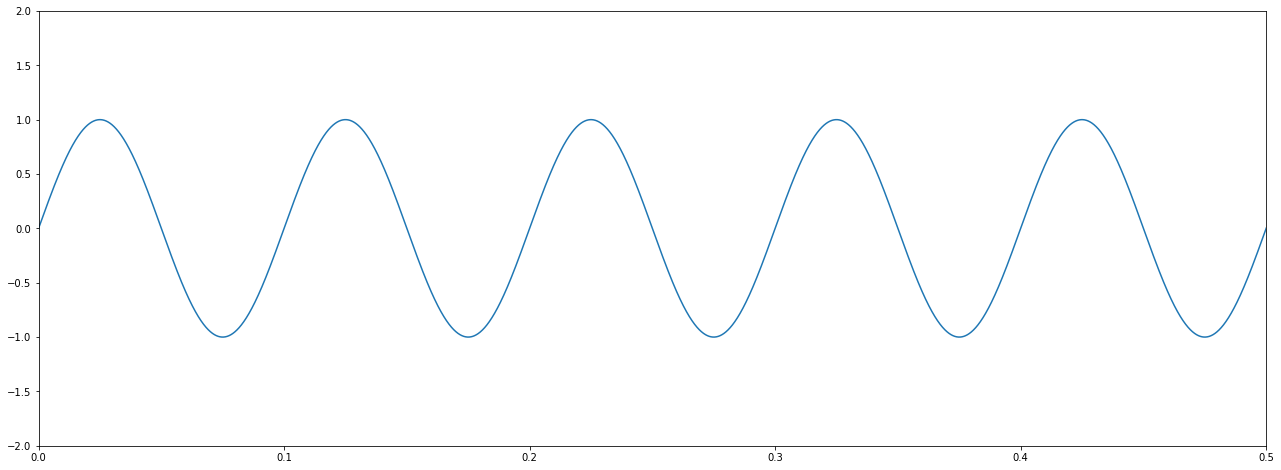

In [18]:
n=np.linspace(0,1,10000000)
fs=22000
duration=6
t=np.arange(0,duration,1/fs)

plt.figure(figsize=(22,8))

sgl=np.sin(2*np.pi*10*t)

plt.plot(t,sgl)
plt.xlim(0,.5)
plt.ylim(-2,2)

Audio(sgl,rate=fs)

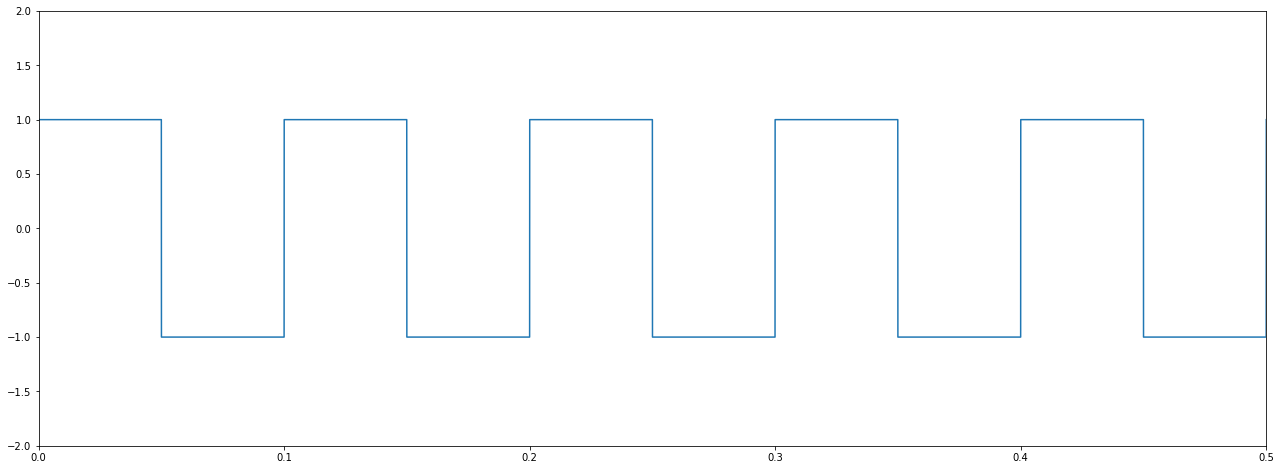

In [20]:
plt.figure(figsize=(22,8))
sgl=signal.square(2*np.pi*10*t)

plt.ylim(-2,2)
plt.xlim(0,0.5)
plt.plot(t,sgl)
Audio(sgl,rate=fs)


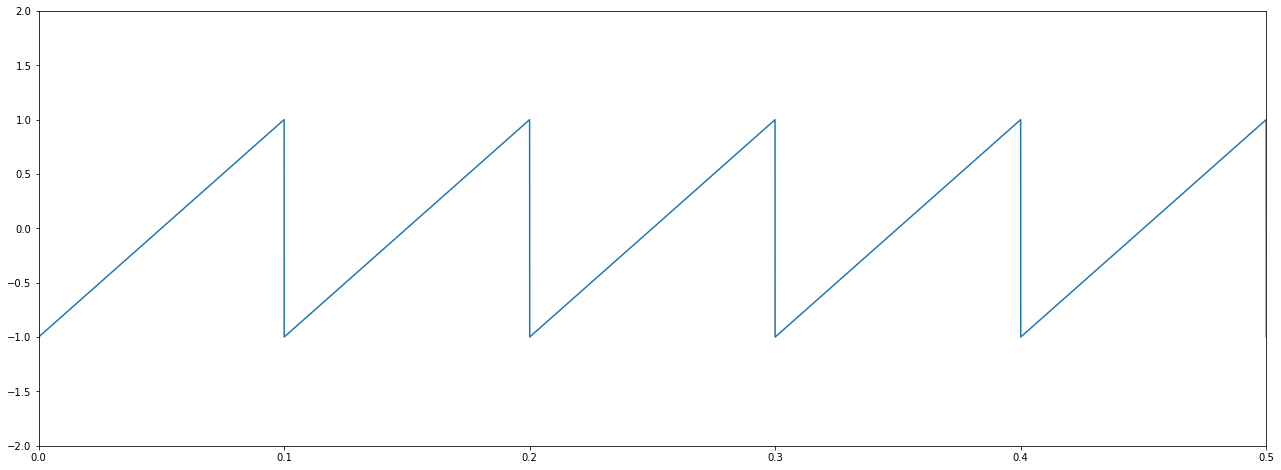

In [22]:
plt.figure(figsize=(22,8))
sgl=signal.sawtooth(2*np.pi*10*t)

plt.ylim(-2,2)
plt.xlim(0,0.5)
plt.plot(t,sgl)
Audio(sgl,rate=fs)